In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import sklearn

In [6]:
import warnings

In [7]:
warnings.filterwarnings("ignore")

In [8]:
file_path = r"F:\Data_Science_Jupyter_Files\module_5_auto.csv"

In [9]:
df = pd.read_csv(file_path, header=0)

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [11]:
# First, let's only use numeric data:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [12]:
# Let's remove the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models.

df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [13]:
# Functions for Plotting

In [14]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName)

    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of Cars")
    plt.show()
    plt.close()

In [15]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [16]:
# Part 1: Training and Testing
# An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y_data:

y_data = df["price"]

In [17]:
# Drop price data in dataframe x_data:

x_data = df.drop("price", axis = 1)

In [18]:
# Now, we randomly split our data into training and testing data using the function train_test_split.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.10, random_state = 1)

print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])

number of test samples:  21
number of training samples:  180


In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state = 0)

print("number of test samples:", x_test1.shape[0])
print("number of training samples:", x_train1.shape[0])

number of test samples: 81
number of training samples: 120


In [20]:
# Let's import LinearRegression from the module linear_model.

from sklearn.linear_model import LinearRegression

In [21]:
# We create a Linear Regression object:

lre = LinearRegression()

In [22]:
# We fit the model using the feature "horsepower":

lre.fit(x_train[["horsepower"]], y_train)

LinearRegression()

In [23]:
# Let's calculate the R^2 on the test data:

lre.score(x_test[["horsepower"]], y_test)

0.36358755750788263

In [24]:
# Let's calculate the R^2 on the train data:

lre.score(x_train[["horsepower"]], y_train)

0.6619724197515104

In [25]:
# We can see the R^2 is much smaller using the test data compared to the training data.

In [26]:
lre.fit(x_train1[["horsepower"]], y_train1)
lre.score(x_test1[["horsepower"]], y_test1)

0.7139364665406973

In [27]:
# Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

In [28]:
# Cross-Validation Score
# Let's import cross_val_score from the module model_selection.

from sklearn.model_selection import cross_val_score

In [29]:
Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv=4)

In [30]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [31]:
print("Mean of the folds are", Rcross.mean(), "and standard deviation of folds are", Rcross.std())

Mean of the folds are 0.522009915042119 and standard deviation of folds are 0.2911839444756029


In [32]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

-1*cross_val_score(lre, x_data[["horsepower"]], y_data, cv=4, scoring="neg_mean_squared_error")

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [33]:
Rc = cross_val_score(lre, x_data[["horsepower"]], y_data, cv=2)
Rc

array([0.59015621, 0.44319613])

In [34]:
Rc.mean()

np.float64(0.5166761697127429)

In [35]:
# You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:

from sklearn.model_selection import cross_val_predict

In [36]:
Yhat = cross_val_predict(lre, x_data[["horsepower"]], y_data, cv=4)
Yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [37]:
# Part 2: Overfitting, Underfitting and Model Selection
# Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

lr = LinearRegression()
lr.fit(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_train)

LinearRegression()

In [38]:
# Prediction using training data:
yhat_train = lr.predict(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [39]:
# Prediction using test data:
yhat_test = lr.predict(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

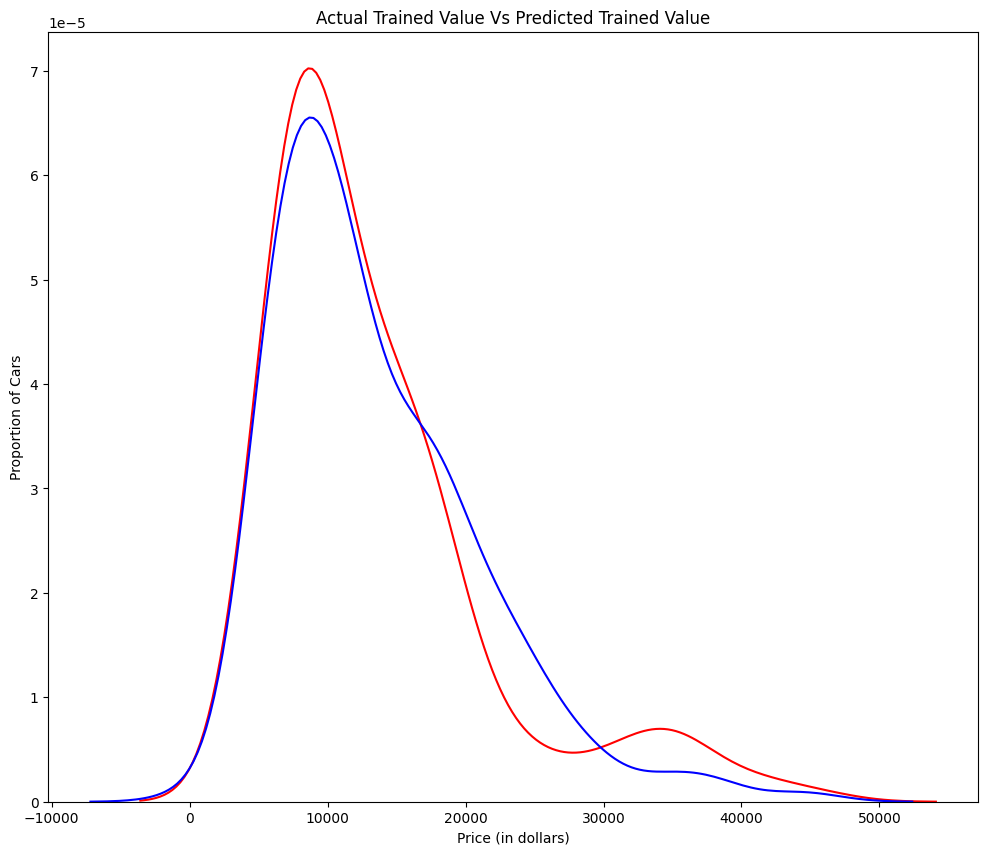

In [40]:
# Let's perform some model evaluation using our training and testing data separately.

%matplotlib inline

Title = "Actual Trained Value Vs Predicted Trained Value"
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

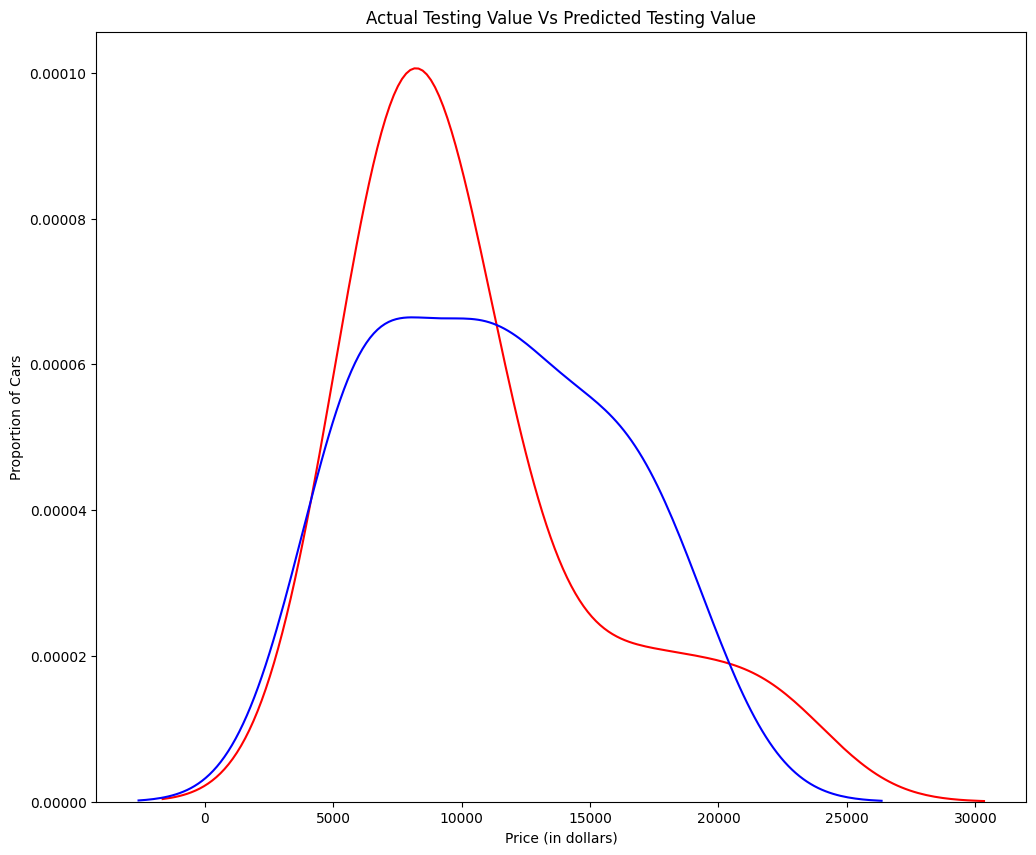

In [41]:
Title = "Actual Testing Value Vs Predicted Testing Value"
DistributionPlot(y_test, yhat_test, "Actual Values (Testing)", "Predicted Values (Testing)", Title)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
# Overfitting
# Overfitting occurs when the model fits the noise, but not the underlying process.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [44]:
# We will perform a degree 5 polynomial transformation on the feature 'horsepower'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5)

In [45]:
# Now, let's create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [46]:
# We can see the output of our model using the method "predict." We assign the values to "yhat"
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

In [47]:
# Let's take the first five predicted values and compare it to the actual targets.
print("predicted test values", yhat[0:4])
print("actual values", y_test[0:4].values)

predicted test values [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
actual values [ 6295. 10698. 13860. 13499.]


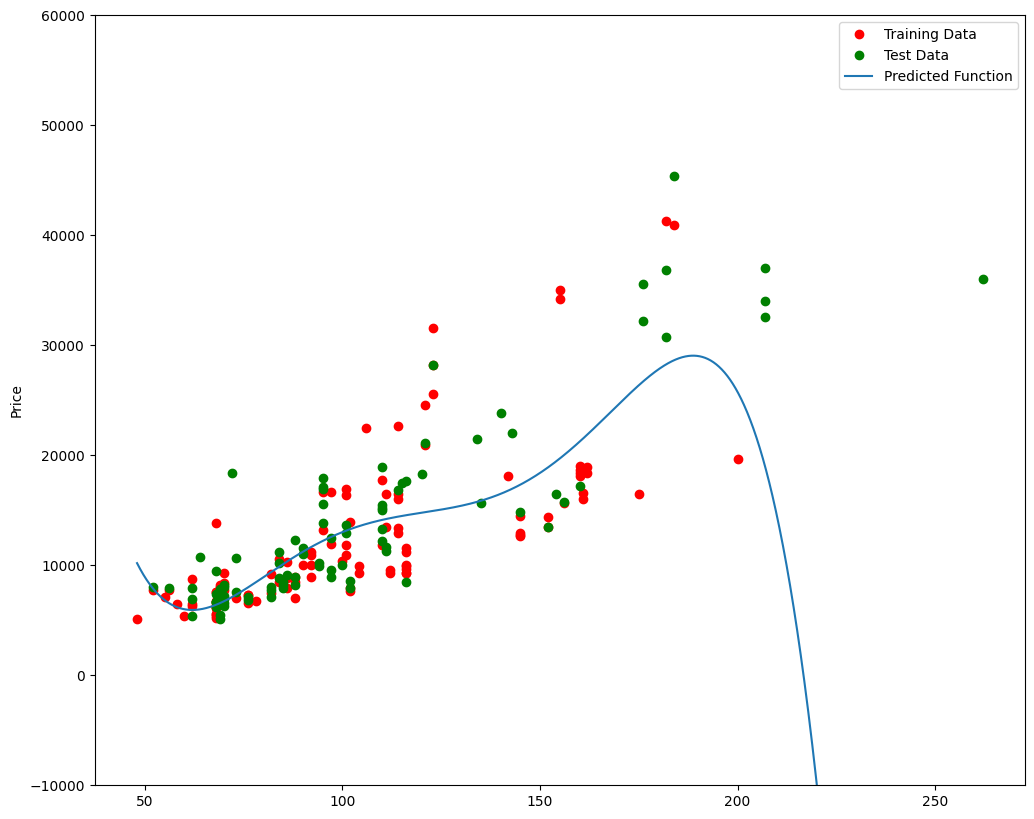

In [48]:
# We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.
PollyPlot(x_train["horsepower"], x_test["horsepower"], y_train, y_test, poly, pr)

In [49]:
# We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.
# R^2 of the training data:
poly.score(x_train_pr, y_train)

0.5567716902121724

In [50]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.87134054062532

In [51]:
# We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.74, 'Maximum R^2')

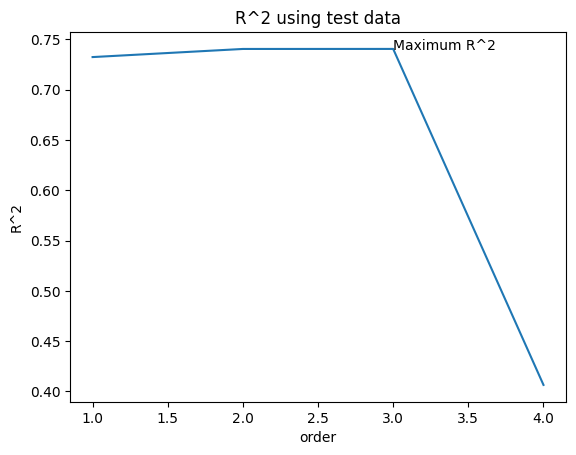

In [52]:
# Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Rsqu_test = []
order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[["horsepower"]])
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel("order")
plt.ylabel("R^2")
plt.title("R^2 using test data")
plt.text(3,0.74,"Maximum R^2")

In [53]:
# We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

In [54]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[["horsepower"]])
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, poly, pr)

In [55]:
# The following interface allows you to experiment with different polynomial orders and different amounts of data.
from ipywidgets import interact

In [56]:
# We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

In [57]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.
x_train_pr1 = pr1.fit_transform(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
x_test_pr1 = pr1.fit_transform(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])

In [58]:
x_train_pr1.shape

(110, 15)

In [59]:
x_test_pr1.shape

(91, 15)

In [60]:
poly1 = LinearRegression()

In [61]:
poly1.fit(x_train_pr1, y_train)

LinearRegression()

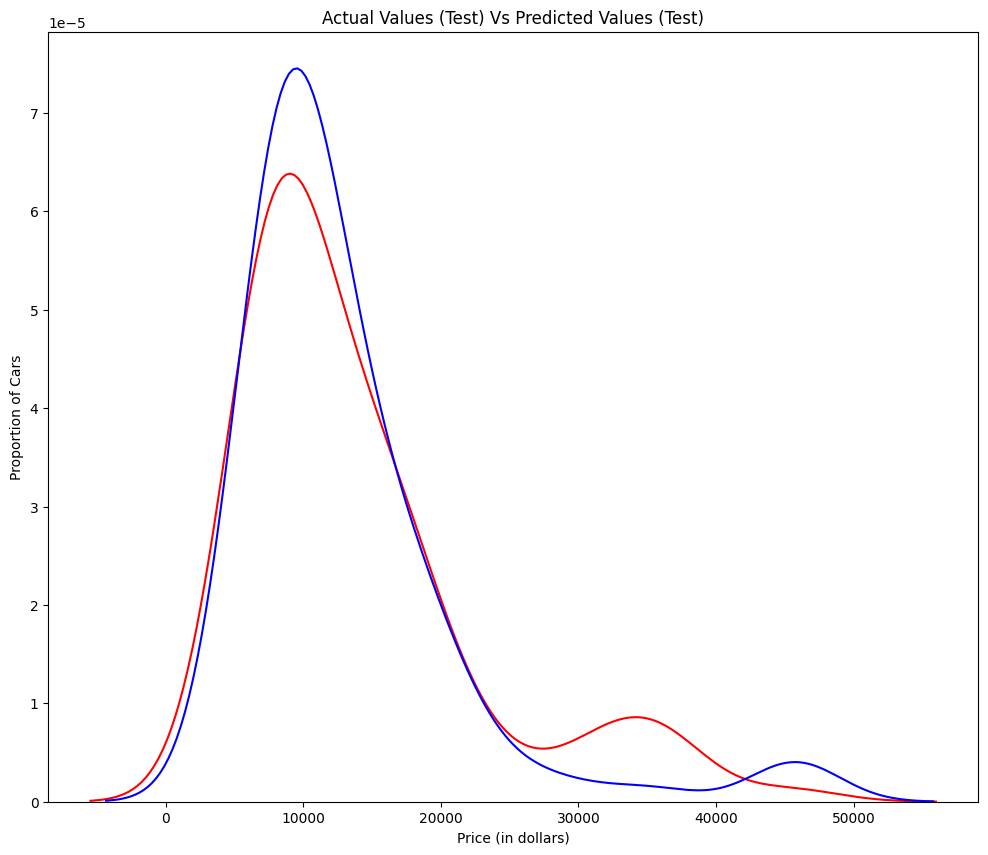

In [62]:
yhat_test1 = poly1.predict(x_test_pr1)
Title = "Actual Values (Test) Vs Predicted Values (Test)"
DistributionPlot(y_test, yhat_test1, "Actual test Values", "Predicted test Values", Title)

In [63]:
# Part 3: Ridge Regression
# Let's perform a degree two polynomial transformation on our data.

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [64]:
# Let's import Ridge from the module linear models.
from sklearn.linear_model import Ridge

In [65]:
# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel = Ridge(alpha=1)

In [66]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [67]:
yhat = RigeModel.predict(x_test_pr)

In [68]:
# Let's compare the first five predicted samples to our test set:

print("Predicted values", yhat[0:4])
print("test set values", y_test[0:4].values)

Predicted values [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set values [ 6295. 10698. 13860. 13499.]


In [69]:
# tqdm is a library that adds a progress bar to loops. It makes it easier to track how far along a long-running loop is.

!pip install tqdm

In [70]:
# tqdm is a library that adds a progress bar to loops. It makes it easier to track how far along a long-running loop is.

from tqdm import tqdm

In [71]:
Rsqu_test = []
Rsqu_train = []
Alpha = 10*np.array(range(0,1000))

# tqdm(Alpha) creates a progress bar for the loop that will run for each value in the Alpha array (which has 1000 values).

pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.99it/s, Test Score=0.564, Train Score=0.859]


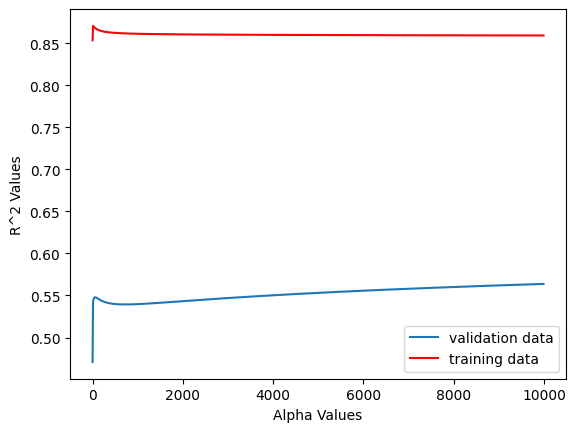

In [72]:
# We can plot out the value of R^2 for different alphas:
plt.plot(Alpha, Rsqu_test, label="validation data")
plt.plot(Alpha, Rsqu_train, "r", label="training data")
plt.xlabel("Alpha Values")
plt.ylabel("R^2 Values")
plt.legend()

In [74]:
# Part 4: Grid Search
# Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.
# Let's import GridSearchCV from the module model_selection.

from sklearn.model_selection import GridSearchCV

In [77]:
# We create a dictionary of parameter values:
parameters1 = [{"alpha": [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [78]:
# Create a Ridge regression object:
RR = Ridge()
RR

Ridge()

In [79]:
# Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [80]:
# Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [81]:
# The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [82]:
# We now test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [83]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:

parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)